In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

na = np.newaxis

In [2]:
from utils import ard_kernel

In [6]:
reference_points = tf.placeholder(tf.float32, [None, None])
grid_positions   = tf.placeholder(tf.float32, [None, None])

ard_kernel_alphas = tf.placeholder(tf.float32, [None])
ard_kernel_gamma  = tf.placeholder(tf.float32, [])

ard_kernel_values = ard_kernel(reference_points, grid_positions, ard_kernel_alphas, ard_kernel_gamma)

In [42]:
alphas  = [0.1, 1., 10., 1e10]
gammas  = [1.]
Tlims = [0, 10]

ref_points = [[5]]

res = 1001
grid = np.linspace(Tlims[0], Tlims[1], res)[:,na]

# 1-D

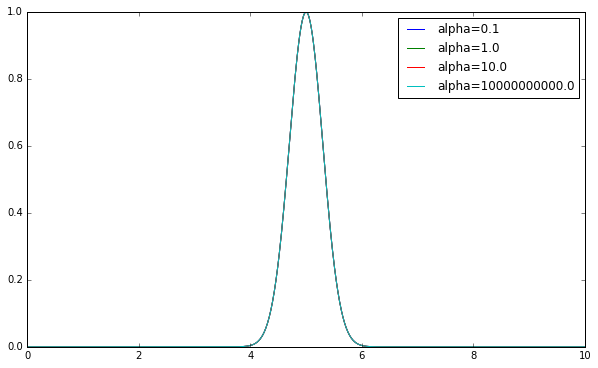

In [44]:
fig=plt.figure(figsize=(10, 6))

for alpha in alphas:
    for gamma in gammas:
        with tf.Session() as sess:
            ard_vals, = sess.run([ard_kernel_values], feed_dict={reference_points: ref_points, grid_positions:grid ,ard_kernel_alphas:alphas, ard_kernel_gamma:gamma})
        
        plt.plot(grid, ard_vals.T, label='alpha={}'.format(alpha))

plt.legend()
plt.show()